


# Importing Librarys

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
import glob
import cv2
import os
from skimage import feature
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [3]:
# Initializing Var.s

dataPath = '/content/drive/MyDrive/AHDBase_TrainingSet' # Contain the train and test data (will split later)
size=28
# Image size
width = size
height = size


#Loading Trainning Dataset

In [4]:
# Read the dataset images

# Printing the labels (folders) inside the data folder
#print(os.listdir(dataPath))

dataImages = []
dataLabels = []

print("Start to read images!\n")

# Loop through each folder inside the data folder
for dirPath in glob.glob(dataPath + "/*"):
    # Then loop on each image inside this foler and add the images to the dataImages 
    # and it's corresponding labels to dataLabels
    # To count images read in this folder
    totalFolderImages = 0
    for imgPath in glob.glob(os.path.join(dirPath, "*.bmp")):
        # Reading image label
        label = (imgPath.split('_')[-1]).split('.')[0];
        # Reading image with no colors (gray)
        img = cv2.imread(imgPath , cv2.IMREAD_GRAYSCALE)
        # Resize image
        img = cv2.resize(img, (width, height)) 
        # Append the image and it's label
        dataImages.append(img)
        dataLabels.append(label)
        totalFolderImages += 1
    print("Total images read from " + dirPath + " is : " + str(totalFolderImages))
        
# Convert the images and labels list to numpy array
dataImages = np.array(dataImages)
dataLabels = np.array(dataLabels)

print("\nReading Images Done!")

Start to read images!

Total images read from /content/drive/MyDrive/AHDBase_TrainingSet/Part03 is : 5000
Total images read from /content/drive/MyDrive/AHDBase_TrainingSet/Part04 is : 5000
Total images read from /content/drive/MyDrive/AHDBase_TrainingSet/Part11 is : 5000
Total images read from /content/drive/MyDrive/AHDBase_TrainingSet/Part10 is : 5000
Total images read from /content/drive/MyDrive/AHDBase_TrainingSet/Part07 is : 5000
Total images read from /content/drive/MyDrive/AHDBase_TrainingSet/Part08 is : 5000
Total images read from /content/drive/MyDrive/AHDBase_TrainingSet/Part06 is : 5000
Total images read from /content/drive/MyDrive/AHDBase_TrainingSet/Part09 is : 5000
Total images read from /content/drive/MyDrive/AHDBase_TrainingSet/Part05 is : 5000
Total images read from /content/drive/MyDrive/AHDBase_TrainingSet/Part12 is : 5000
Total images read from /content/drive/MyDrive/AHDBase_TrainingSet/Part02 is : 5000
Total images read from /content/drive/MyDrive/AHDBase_TrainingSe

#Splitting Data


In [5]:
(x_train , x_val , y_train , y_val) = train_test_split(dataImages , dataLabels , test_size = 0.15 , random_state = 0)
(x_train , x_test , y_train , y_test) = train_test_split(x_train , y_train , test_size = 0.15 , random_state = 0)

In [6]:
print(x_train.shape)

(43350, 28, 28)


In [7]:
df=pd.DataFrame(dataLabels)
df.value_counts()

digit0    6000
digit1    6000
digit2    6000
digit3    6000
digit4    6000
digit5    6000
digit6    6000
digit7    6000
digit8    6000
digit9    6000
dtype: int64

In [8]:
x_train = x_train.reshape(x_train.shape[0], size, size, 1)
x_val = x_val.reshape(x_val.shape[0], size, size, 1)
x_test = x_test.reshape(x_test.shape[0], size, size, 1)

In [9]:
input_shape = (size, size, 1)
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test= x_test.astype('float32')

x_train /= 255
x_val /= 255
x_test /=255

In [10]:
y_train=pd.get_dummies(y_train)
y_test=pd.get_dummies(y_test)
y_val=pd.get_dummies(y_val)

In [11]:
model = keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape))

model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128,activation='relu'))

model.add(tf.keras.layers.Dense(10,activation='softmax'))



In [12]:
model.compile(loss='categorical_crossentropy',
  optimizer='adam',metrics=['accuracy'])

history=model.fit(x_train, y_train,batch_size=64,epochs=20,validation_data=(x_val, y_val))


Epoch 1/20
678/678 [==============================] - 14s 6ms/step - loss: 0.1466 - accuracy: 0.9573 - val_loss: 0.0495 - val_accuracy: 0.9841
Epoch 2/20
678/678 [==============================] - 4s 6ms/step - loss: 0.0367 - accuracy: 0.9886 - val_loss: 0.0369 - val_accuracy: 0.9884
Epoch 3/20
678/678 [==============================] - 4s 6ms/step - loss: 0.0229 - accuracy: 0.9928 - val_loss: 0.0352 - val_accuracy: 0.9887
Epoch 4/20
678/678 [==============================] - 4s 6ms/step - loss: 0.0148 - accuracy: 0.9953 - val_loss: 0.0344 - val_accuracy: 0.9896
Epoch 5/20
678/678 [==============================] - 4s 6ms/step - loss: 0.0090 - accuracy: 0.9970 - val_loss: 0.0437 - val_accuracy: 0.9881
Epoch 6/20
678/678 [==============================] - 4s 6ms/step - loss: 0.0073 - accuracy: 0.9977 - val_loss: 0.0354 - val_accuracy: 0.9904
Epoch 7/20
678/678 [==============================] - 4s 6ms/step - loss: 0.0066 - accuracy: 0.9978 - val_loss: 0.0421 - val_accuracy: 0.9900
Epoch

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [14]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
y_pred=pd.get_dummies(y_pred)

In [15]:
from sklearn.metrics import accuracy_score
print("accuracy: "+ str(accuracy_score(y_test, y_pred)*100))

accuracy: 99.08496732026144


In [16]:
from sklearn.metrics import confusion_matrix
array=confusion_matrix(y_test.values.argmax(axis=1), y_pred.values.argmax(axis=1))

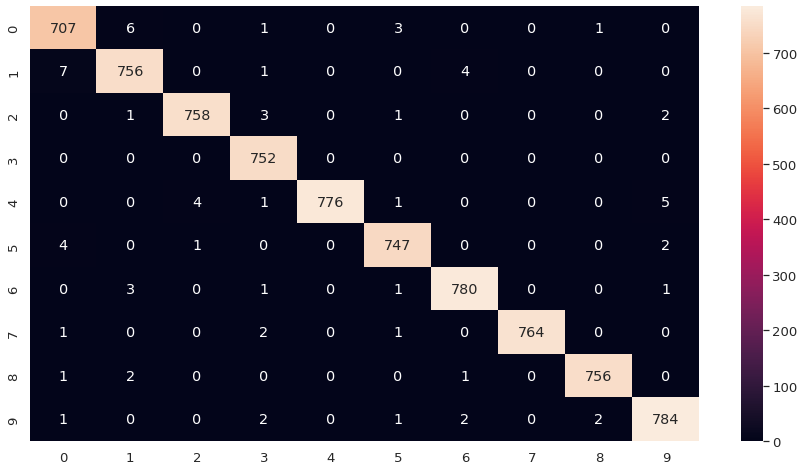

In [17]:
df_cm = pd.DataFrame(array, range(10), range(10))
sn.set(font_scale=1.2) # for label size
plt.figure(figsize=(15,8))
sn.heatmap(df_cm, annot=True, fmt="d") # font size
plt.show()

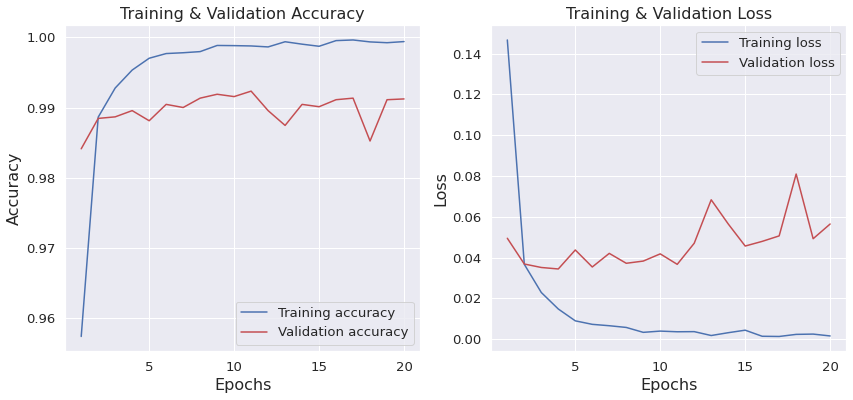

In [18]:
import matplotlib.pyplot as plt
 
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'b', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy',color='r')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'b', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss',color='r')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

Real : [2] and Predicted : [2]


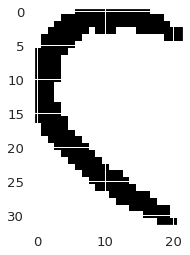

Real : [6] and Predicted : [6]


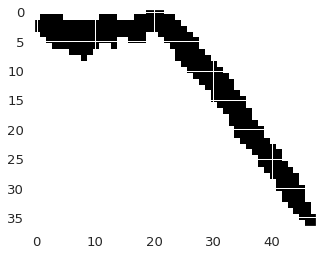

Real : [3] and Predicted : [3]


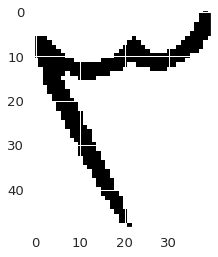

Real : [3] and Predicted : [3]


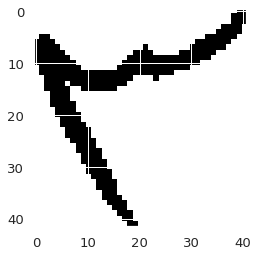

Real : [8] and Predicted : [8]


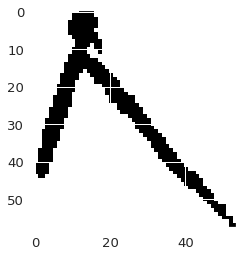

Real : [9] and Predicted : [9]


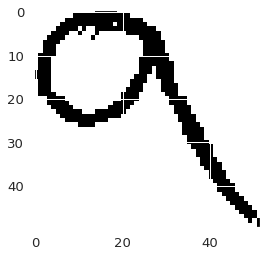

Real : [2] and Predicted : [2]


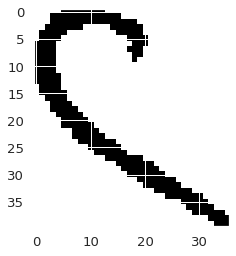

Real : [7] and Predicted : [7]


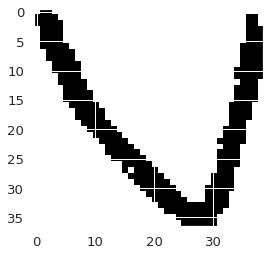

Real : [7] and Predicted : [7]


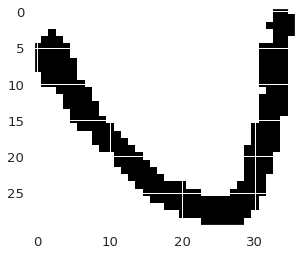

Real : [7] and Predicted : [7]


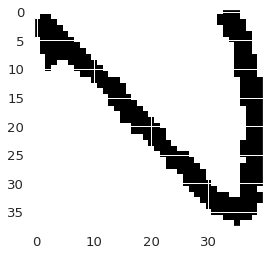

Real : [9] and Predicted : [9]


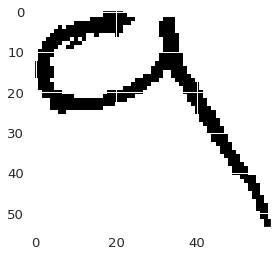

Real : [6] and Predicted : [6]


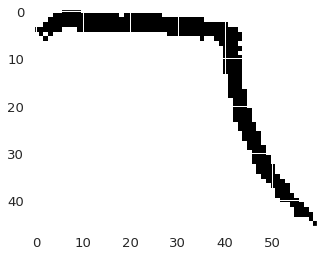

Real : [1] and Predicted : [1]


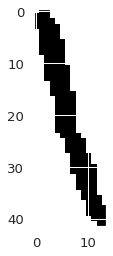

Real : [0] and Predicted : [0]


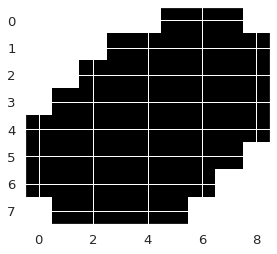

Real : [5] and Predicted : [5]


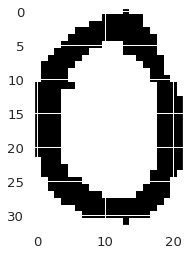

In [36]:
# Validate

validPath='/content/drive/MyDrive/AHDBase_TestingSet'


def validate(img):  
  img = cv2.resize(img, (width, height)) #Resize images
  prediction = model.predict(img.reshape(1, size, size, 1))
  prediction=np.argmax(prediction,axis=1)
 # prediction=pd.get_dummies(prediction)
  return prediction

i=0
for directory_path in glob.glob(validPath + "/*"):
 
  for img_path in glob.glob(os.path.join(directory_path, "*.bmp")):
    i+=1
    if(i>15): 
      break

    label = (img_path.split('_')[-1]).split('.')[0];
    img = cv2.imread(img_path , cv2.IMREAD_GRAYSCALE) 

    plt.imshow(img,cmap='Greys_r')

    prediction = validate(img)

    print( "Real : [" + str(label)[-1] + "] and Predicted : "+ str(prediction) )

    plt.show()



#prediction = validate(img)
#print( "Real" + "   5  " + " and Predicted : "+ str(prediction) )
#plt.imshow(img)